In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open('/Users/jyang872/Desktop/CrappySolver/process.json', 'r') as f:
    crappy_data = json.load(f)
with open('/Users/jyang872/Desktop/fuzzy-tribble/process.json', 'r') as f:
    fuzzy_data = json.load(f)
fuzzy_lbd_cals=fuzzy_data["outsideAlgo"]["LBD_calculation_records"]
crappy_lbd_cals=crappy_data["outsideAlgo"]["LBD_calculation_records"]


In [93]:
crappy_data["outsideAlgo"].keys()

dict_keys(['LBD_calculation_records', 'first_stage_IX_record', 'LBD_values_records', 'LBD_calculation_time_records'])

/var/folders/8f/7hlpwq3n64b0x53crzr0w9pc0000gn/T/ipykernel_61054/4161442769.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


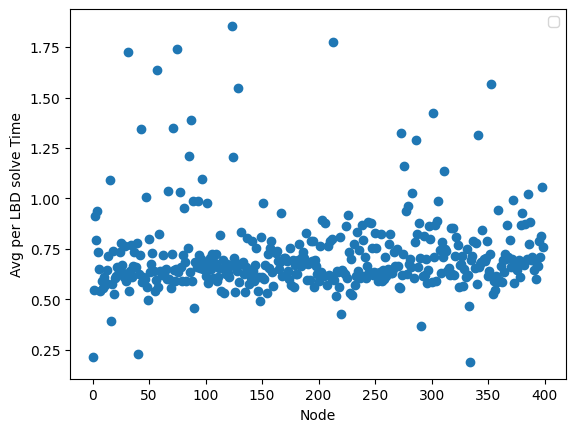

In [73]:
def plot_avg_LBD_solve_each_BBNode(crappy_data,fuzzy_data,start,end):
    crappy_avg_lbd_time_per_BBNode=[]
    for v1,v2 in zip(crappy_data["outsideAlgo"]["LBD_calculation_records"],crappy_data["outsideAlgo"]["LBD_calculation_time_records"]):
            if v1!=0:
                crappy_avg_lbd_time_per_BBNode.append(v2/v1)
    fuzzy_avg_lbd_time_per_BBNode=[]
    for v1,v2 in zip(fuzzy_data["outsideAlgo"]["LBD_calculation_records"],fuzzy_data["outsideAlgo"]["LBD_calculation_time_records"]):
        if v1!=0:
            fuzzy_avg_lbd_time_per_BBNode.append(v2/v1)

    # plt.scatter(range(start,end), crappy_avg_lbd_time_per_BBNode[start:end],label="CZ")
    # plt.scatter(range(start,end), fuzzy_avg_lbd_time_per_BBNode[start:end],label="New")
    plt.scatter(range(start,end), np.array(crappy_avg_lbd_time_per_BBNode[start:end])/np.array(fuzzy_avg_lbd_time_per_BBNode[start:end]))
    plt.xlabel('Node')
    plt.ylabel('Avg per LBD solve Time')
    plt.legend()
plot_avg_LBD_solve_each_BBNode(crappy_data,fuzzy_data,0,400)

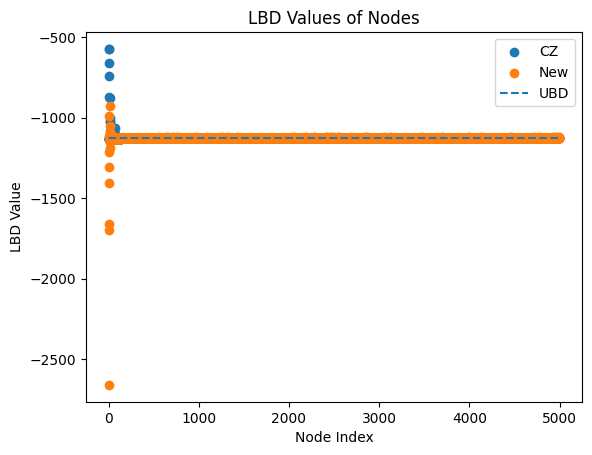

In [90]:
def plot_LBD_values(crappy_data,fuzzy_data,start,end):
    plt.scatter(range(start,end), crappy_data["outsideAlgo"]["LBD_values_records"][start:end],label="CZ")
    plt.scatter(range(start,end), fuzzy_data["outsideAlgo"]["LBD_values_records"][start:end],label="New")
    plt.plot(range(start,end), -1126.42*np.ones(len(crappy_data["outsideAlgo"]["LBD_values_records"][start:end])),label="UBD",linestyle='dashed')
    plt.xlabel('Node Index')
    plt.ylabel('LBD Value')
    plt.title('LBD Values of Nodes')
    plt.legend()
plot_LBD_values(crappy_data,fuzzy_data,0,5000)

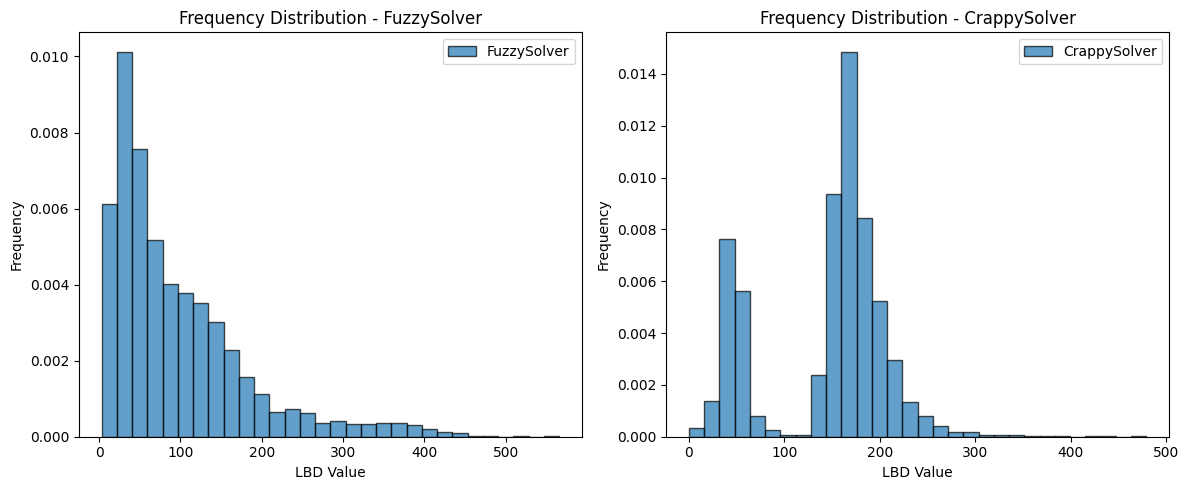

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(fuzzy_lbd_cals[100:], bins=30, alpha=0.7, label='FuzzySolver', edgecolor='black',density=True)
plt.xlabel('LBD Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - FuzzySolver')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(crappy_lbd_cals[100:], bins=30, alpha=0.7, label='CrappySolver', edgecolor='black', density=True)
plt.xlabel('LBD Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution - CrappySolver')
plt.legend()

plt.tight_layout()
plt.show()

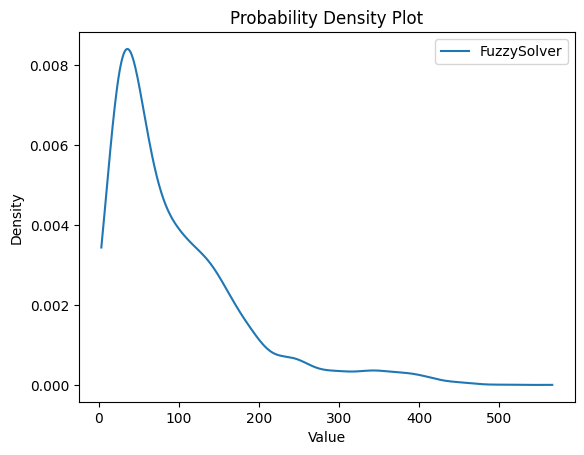

In [18]:
# Probability density plot (kernel density estimate) for a list of numbers
x = np.asarray(fuzzy_lbd_cals, dtype=float)
x = x[np.isfinite(x)]

xs = np.linspace(x.min(), x.max(), 400)
bw = 1.06 * x.std(ddof=1) * (len(x) ** (-1/5))
density = np.zeros_like(xs)
for xi in x:
    density += np.exp(-0.5 * ((xs - xi) / bw) ** 2)
density /= (len(x) * bw * np.sqrt(2 * np.pi))

plt.plot(xs, density, label="FuzzySolver")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Probability Density Plot")
plt.legend()
plt.show()

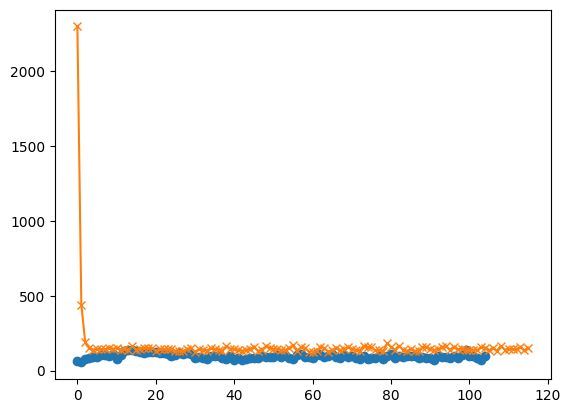

In [13]:
lbd_cals=fuzzy_lbd_cals
# Calculate average for every 10 lbd_cals
bin_size = 50
avg_lbd = [sum(lbd_cals[i:i+bin_size])/len(lbd_cals[i:i+bin_size]) for i in range(0, len(lbd_cals), bin_size)]
bin_indices = [i//bin_size for i in range(0, len(lbd_cals), bin_size)]

plt.plot(bin_indices, avg_lbd, marker='o')
lbd_cals=crappy_lbd_cals
# Calculate average for every 10 lbd_cals
bin_size = 50
avg_lbd = [sum(lbd_cals[i:i+bin_size])/len(lbd_cals[i:i+bin_size]) for i in range(0, len(lbd_cals), bin_size)]
bin_indices = [i//bin_size for i in range(0, len(lbd_cals), bin_size)]
plt.plot(bin_indices, avg_lbd, marker='x')